I did this a bit flippantly before, but I want to fomalize the process by which we estimate the uncertainty on emulator predictions. 

In [22]:
from pearce.emulator import NashvilleHot
from GPy.kern import *
import numpy as np
from os import path

In [23]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [24]:
training_file = '/home/users/swmclau2/scratch/xi_gg_abzheng07/PearceXiggHSABCosmo.hdf5'
#test_file = '/home/users/swmclau2/scratch/xi_gg_zheng07_cosmo_test_v3/PearceXiggCosmoTest.hdf5'

In [25]:
em_method = 'gp'

In [26]:
fixed_params = {'z':0.0}

In [27]:
hyperparams = {'kernel': (Linear(input_dim=7, ARD=True) + RBF(input_dim=7, ARD=True)+Bias(input_dim=7),
                            RBF(input_dim=6, ARD=True)+Bias(input_dim=6) ), \
               'optimize': False}

In [28]:
emu = NashvilleHot(training_file, hyperparams=hyperparams,fixed_params = fixed_params, downsample_factor = 0.1)

In [29]:
default_dict = {}
for pname in emu.get_param_names():
    l, h = emu.get_param_bounds(pname)
    default_dict[pname] = (l+h)/2.0

In [30]:
N = 6
cmap = sns.color_palette("GnBu_d", N)

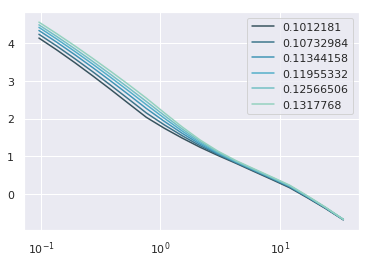

In [31]:
pname = 'omch2'
l, h = emu.get_param_bounds(pname)
d = default_dict.copy()
for v, c in zip(np.linspace(l,h,N), cmap):
    d[pname] = v
    y = emu.emulate_wrt_r(d)[0]
    plt.plot(emu.scale_bin_centers, y, label = v, c = c)
    
plt.xscale('log')
plt.legend(loc = 'best')
plt.show();

In [32]:
N = 6
cmap = sns.color_palette("Reds", N)

In [33]:
emu.get_param_names()

['ombh2',
 'omch2',
 'w0',
 'ns',
 'ln10As',
 'H0',
 'Neff',
 'logM1',
 'logM0',
 'sigma_logM',
 'mean_occupation_cens_assembias_param',
 'mean_occupation_sats_assembias_param',
 'alpha']

In [34]:
default_y = emu.emulate_wrt_r(default_dict)

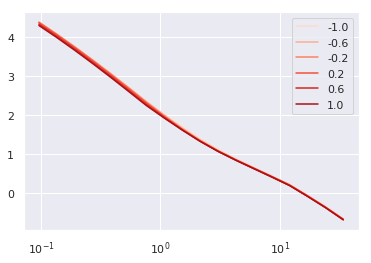

In [39]:
pname = 'mean_occupation_cens_assembias_param'
l, h = emu.get_param_bounds(pname)
d = default_dict.copy()
for v, c in zip(np.linspace(l,h,N), cmap):
    d[pname] = v
    y = emu.emulate_wrt_r(d)[0]
    plt.plot(emu.scale_bin_centers, y, label = v, c = c)
    
plt.xscale('log')
plt.legend(loc = 'best')
plt.show();

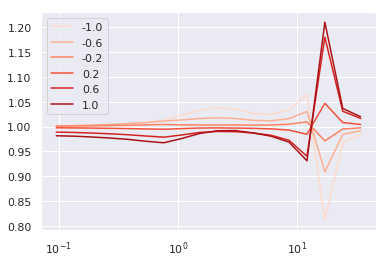

In [40]:
for v, c in zip(np.linspace(l,h,N), cmap):
    d[pname] = v
    y = emu.emulate_wrt_r(d)[0]
    plt.plot(emu.scale_bin_centers, y/default_y[0], label = v, c = c)
    
plt.xscale('log')
plt.legend(loc = 'best')
plt.show();

In [37]:
emu._kernels[0][1].rbf.lengthscale

index,KGPR.sum_1.rbf.lengthscale,constraints,priors
[0],1.00000000,+ve,
[1],1.00000000,+ve,
[2],1.00000000,+ve,
[3],1.00000000,+ve,
[4],1.00000000,+ve,
[5],1.00000000,+ve,


In [38]:
emu.get_param_names()

['ombh2',
 'omch2',
 'w0',
 'ns',
 'ln10As',
 'H0',
 'Neff',
 'logM1',
 'logM0',
 'sigma_logM',
 'mean_occupation_cens_assembias_param',
 'mean_occupation_sats_assembias_param',
 'alpha']